In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
rc("font", family="serif", size=11)

Here we shall import some data taken from HiROS and import into a pandas dataframe for analysis.

In [6]:
# Import required data
broomhall = '../data/broomhall2009.txt'
davies = '../data/davies2014.txt'

file = input("Please select file: 'broomhall' or 'davies': ")
if file == str('broomhall'):
    file = broomhall
elif file == str('davies'):
    file = davies
else:
    print('Please try again')

df = pd.read_csv(file, header=None, delim_whitespace=True, names=['n', 'l', 'nu', 'sg_nu'])
df.head()

Please select file: 'broomhall' or 'davies': broomhall


,n,l,nu,sg_nu
0,6,0,972.613,0.002
1,7,1,1185.592,0.004
2,8,0,1263.162,0.012
3,8,1,1329.629,0.004
4,8,2,1394.680,0.011


We can see from the preview above that the file contains a mix of radial modes at increasing orders. To perform any useful analysis, the induvidual modes $l$ must be considered separately. A neat way of doing this is to use a list comprehension, which avoids the need for multiple for loops and appending to arrays each time. This produces separate arrays for each value of $l$ which are contained within an overall list that can be called.

In [7]:
l = [df[(df.l == i)] for i in (range(max(df.l)-min(df.l)+1))]

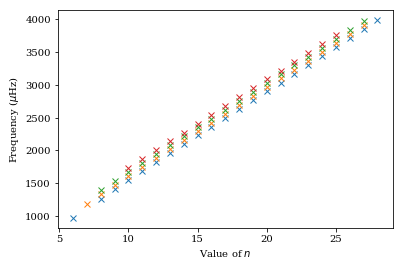

135.47200
135.68600
135.55400
135.65200


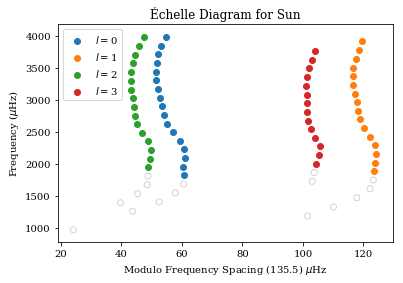

In [8]:
plt.figure(1)
plt.errorbar(l[0].n, l[0].nu, yerr=l[0].sg_nu, fmt='x')
plt.errorbar(l[1].n, l[1].nu, yerr=l[1].sg_nu, fmt='x')
plt.errorbar(l[2].n, l[2].nu, yerr=l[2].sg_nu, fmt='x')
plt.errorbar(l[3].n, l[3].nu, yerr=l[3].sg_nu, fmt='x')
plt.xlabel('Value of $n$')
plt.ylabel('Frequency ($\mu$Hz)')
plt.show()

print(u"%.5f" % np.median(np.diff(l[0].nu)))
print(u"%.5f" % np.median(np.diff(l[1].nu)))
print(u"%.5f" % np.median(np.diff(l[2].nu)))
print(u"%.5f" % np.median(np.diff(l[3].nu)))


# Échelle Plot for the data
mod = 135.5
plt.figure(2)
# New plotting method
for i in range(max(df.l)-min(df.l)+1):
    plt.scatter(df.loc[(df.l == i) & (df.n > 11)].nu % 135.5, df.loc[(df.l == i) & (df.n > 11)].nu,
                label=r'$l=$'+str(i))
    plt.scatter(df.loc[(df.l == i) & (df.n < 12)].nu % 135.5, df.loc[(df.l == i) & (df.n < 12)].nu,
                facecolors='none', edgecolors=['lightgrey'], label='')
plt.title('Échelle Diagram for Sun')
plt.xlabel('Modulo Frequency Spacing ('+ str(mod) +') $\mu$Hz')
plt.ylabel('Frequency ($\mu$Hz)')
plt.legend()
plt.show()

The above Échelle diagrams show how the four lowest modes form broadly straight lines in modulo frequency space, though there are significant deviations that form a tail at the lower values of $n$ (visible as faint circles). We shall select only the $l=0$ modes for analysis.



#### Using Vrard Paper

To compute the local frequency separation for a mode $\nu_{n,0}$ we use the average difference over the adjacent modes
$$ \Delta\nu(n) = \frac{\nu_{n+1,0} - \nu_{n-1,0}}{2}$$
which cannot be appropriately calculated for modes the limits of n.

The asymptotic dependence of the large frequency separation wrt. n is given in the paper as
$$ \Delta\nu_{\textrm{up}}(n) = \left( 1 + \alpha\left(n-n_\textrm{max}\right)\right) \left<\Delta\nu\right>$$
where $\alpha$ is defined by the power law $\alpha = A\left<\Delta\nu\right>^Β$. In the paper, the constants are set as $A=0.015$ and $B=-0.32$

Having calulated these extra frequencies $\Delta\nu_\textrm{up}$, the difference between the theoretical and observed large frequency separation is calculated with $\delta_\textrm{g,obs} = \Delta\nu(n) - \Delta\nu_{\textrm{up}}(n)$

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

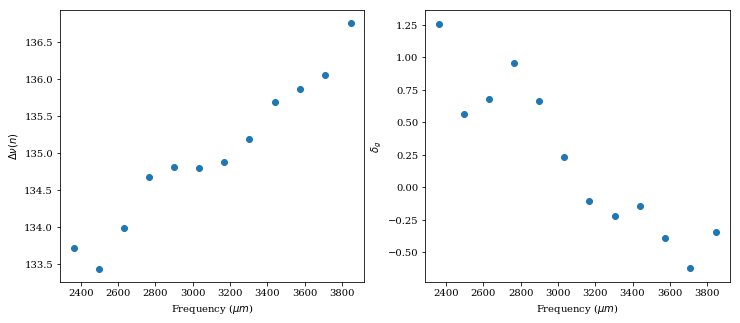

,n,l,nu,sg_nu,dnu_n,dnu_up,dg
28,15,0,2228.749,0.014,NaN,132.036493,NaN
32,16,0,2362.788,0.016,133.7155,132.457887,1.257613
36,17,0,2496.180,0.017,133.4400,132.879281,0.560719
40,18,0,2629.668,0.015,133.9810,133.300675,0.680325
44,19,0,2764.142,0.015,134.6770,133.722069,0.954931
48,20,0,2899.022,0.013,134.8060,134.143462,0.662538
52,21,0,3033.754,0.014,134.7980,134.564856,0.233144
56,22,0,3168.618,0.017,134.8830,134.986250,-0.103250
60,23,0,3303.520,0.021,135.1870,135.407644,-0.220644
64,24,0,3438.992,0.030,135.6865,135.829038,-0.142538


In [9]:
nmax = 22
# Modelling from Vrard Paper

l0 = df.loc[(df.l == 0) & (df.n > 14)]
l0['dnu_n'] = (l0['nu'].diff(2).shift(-1))/2   # Differences between neighbouring frequencies

alpha = 0.015*np.mean(l0['dnu_n'])**(-0.32)    # Equation provided in paper

l0['dnu_up'] = (1 + alpha*(l0['n']-nmax)) * (np.mean(l0['dnu_n']))   # Calculating Δν_up (see equation above)

l0['dg'] = l0['dnu_n']-l0['dnu_up']    # Difference between theoretical and observed large freq spacings


# Plots to replicate results of Figure 2 in the Vrard paper
plt.figure(10, figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(l0.nu, l0.dnu_n)
plt.xlabel(r'Frequency ($\mu m$)')
plt.ylabel(r'$\Delta\nu(n)$')
plt.subplot(1,2,2)
plt.scatter(l0.nu, l0.dg)
plt.xlabel(r'Frequency ($\mu m$)')
plt.ylabel(r'$\delta_g$')
plt.show()

#l0.to_csv('l0_test.csv')
#l0['y'] = 0.0000018703798342580922*l0['nu']**2 + l0['nu']*(-0.013109745137993805) + 22.46095493384917
#plt.scatter(l0.nu, l0.dg - l0.y)


l0

In order to provide Stan with suitable starting parameters (to prevent the complete lack of convergance), we shall first attempt to manually fit a rather basic model to the data.

$ \Delta\nu(n+\epsilon) + k(\frac{\nu_\textrm{max}}{\Delta\nu}+n)^2 + A\sin(\omega n+\phi)e^{-(n/\tau)}$

where the latter terms represent the curvature and a decaying oscillatory component. $k$ is the curvature parameter, whilst $\tau$ is a decay parameter for the glitch. We can then attempt to replicate this using Stan.

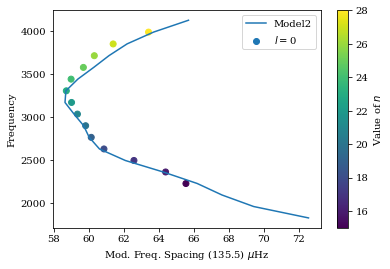

In [185]:
# Look at l=0 data initially only
plt.figure(3)
plt.scatter(l0.nu % 135.2, l0.nu, 
            c=l0.n,cmap='viridis',
            label=r'$l=$'+str(0))
plt.colorbar(label=r'Value of $n$')


#def model(n, dnu, numax, epsilon, k, A, omega, phi):
#    freqs = (n + epsilon) * dnu
#    nmax = numax/dnu + epsilon
#    freqs += (nmax-n)**2 * k
#    freqs += A*np.sin(omega*n + phi)
#    return freqs
def model2(n, dnu, nmax, epsilon, k, A, omega, phi, tau):
    freqs = (n + epsilon) * dnu
    freqs += (nmax-n)**2 * k
    freqs += A*np.sin(omega*n + phi)*np.exp(-n/tau)
    return freqs

dnu = 135.2

n = np.arange(12,30,1)
#f = model(n, dnu, 3050.0, 1.436, 0.07, 0.3, 2, 0)
f2 = model2(n, dnu, 22, 1.435, 0.14, 2.7, 5, 2.5, 10)
#plt.plot(f % dnu, f, label='Model')
plt.plot(f2 % dnu, f2, label='Model2')
plt.ylabel('Frequency')
plt.xlabel(r'Mod. Freq. Spacing ('+ str(mod) +') $\mu$Hz')
plt.legend()
plt.show()

In [189]:
code = '''
functions {
    real model(real n, real dnu, real nmax, real epsilon, real k, real A, real omega, real phi, real tau){
        return (dnu*(n+epsilon) + k*(nmax - n)^2 + A*sin(omega*n + phi)*exp(-n/tau));
    }
}
data {
    int N;
    real n[N];
    real freq[N];
    real freq_err[N];
    real dnu_guess;
}
parameters {
    real<lower = 0> dnu;
    real<lower = 0> nmax;
    real epsilon;
    real k;
    real<lower = 0> A;
    real<lower = 0> omega;
    real<lower = -2.0*pi(), upper = 2.0*pi()> phi;
    real<lower = 0> tau;
}
model {
    real mod[N];
    for (i in 1:N){
        mod[i] = model(n[i], dnu, nmax, epsilon, k, A, omega, phi, tau);
    }
    
    mod ~ normal(freq, freq_err);
    dnu ~ normal(dnu_guess, dnu_guess*0.001);
    nmax ~ normal(20,4);
    epsilon ~ normal(1.4, 0.1);
    k ~ lognormal(log(0.14), 0.3);
    A ~ lognormal(log(0.1), 0.3);
    omega ~ normal(0.8, 0.1);
    tau ~ normal(10,5);
    // phi ~ normal(0, 1.5);
    
}
'''
import pystan
sm = pystan.StanModel(model_code=code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1dc4c3b2e4154ffcd45340920a3aa384 NOW.


In [201]:
stan_data = {'N': len(l0['n'].values),
             'n': l0['n'].values, 
             'freq': (l0['nu'].values),
             'freq_err': l0['sg_nu'].values,
             'dnu_guess': dnu
            }
start = {'dnu': dnu,
         'nmax': 22,
         'epsilon': 1.435,
         'k': 0.14,
         'A': 0.5,
         'omega': 5,
         'phi': 2.5,
         'tau': 50
        }
nchains = 4

fit = sm.sampling(data=stan_data, iter=5000, chains=nchains, init=[start for n in range(nchains)],)
                  #control=dict(max_treedepth=15))

In [202]:
print(fit)

Inference for Stan model: anon_model_1dc4c3b2e4154ffcd45340920a3aa384.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
dnu     135.21    0.01   0.13 134.96 135.12  135.2 135.29 135.48    140   1.02
nmax     22.54    0.05   0.57  21.46  22.15  22.51  22.89  23.71    140   1.02
epsilon   1.43  2.0e-3   0.02   1.38   1.42   1.44   1.45   1.48    140   1.02
k         0.12  2.3e-5 8.1e-4   0.12   0.12   0.12   0.12   0.12   1248    1.0
A         2.68    0.02   0.44   1.94   2.38   2.64   2.95   3.65    741   1.01
omega     4.93  3.7e-4 8.9e-3   4.91   4.92   4.93   4.93   4.94    564   1.01
phi       4.55  6.7e-3   0.16   4.24   4.45   4.55   4.66   4.86    562   1.01
tau       9.43    0.03   0.77   8.09   8.89   9.39   9.92  11.09    751   1.01
lp__    -985.0    0.06   2.02 -989.8 -986.0 -984.6 -983.5 -982.0    974    1.0

Samples were drawn 

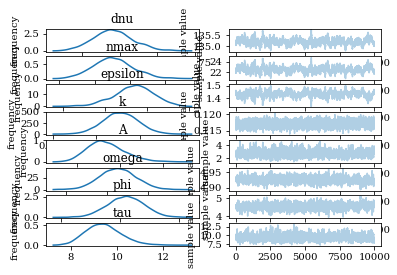

In [203]:
fit.plot()
plt.show()

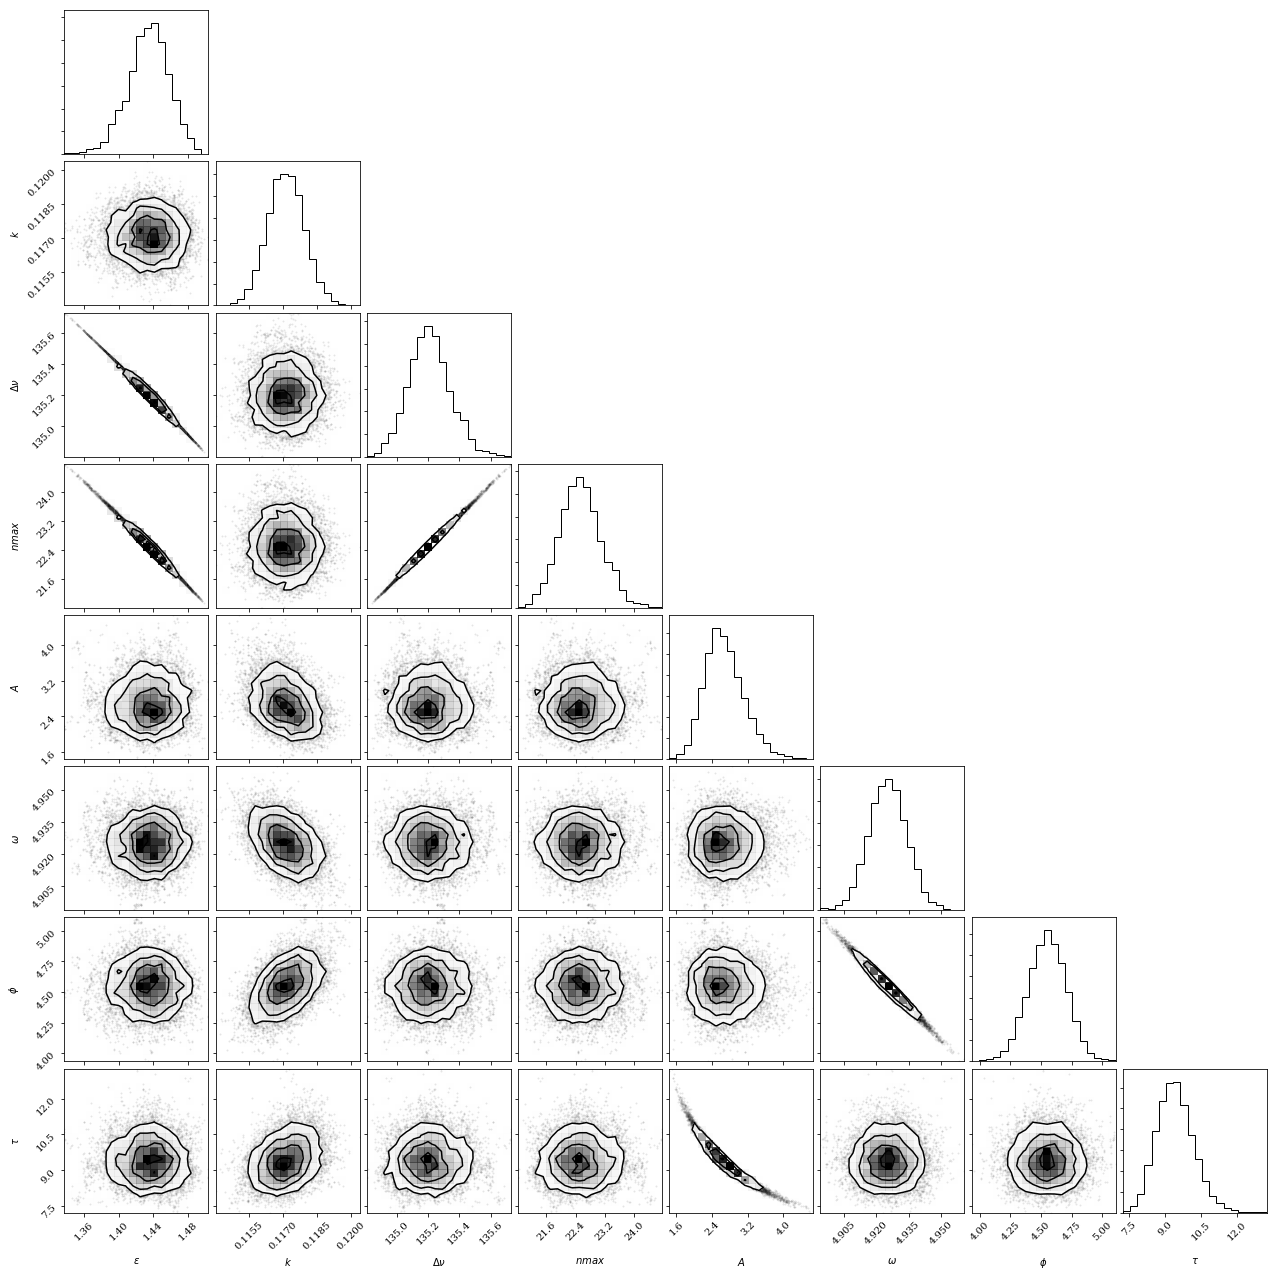

In [204]:
import corner
data = np.vstack([fit['epsilon'], fit['k'], fit['dnu'], fit['nmax'],
                  fit['A'], fit['omega'], fit['phi'], fit['tau']]).T
corner.corner(data, labels=[r'$\epsilon$', r'$k$',r'$\Delta\nu$',r'$n max$',
                            r'$A$', r'$\omega$', r'$\phi$', r'$\tau$'])
              #, truths=[1.436, 0.07, 0.3, 2, 0])
plt.show()

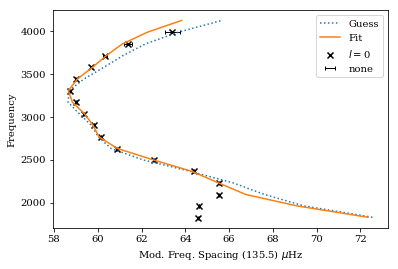

In [205]:
n = np.arange(12,30,1)

plt.figure(4)
plt.scatter(df.loc[(df.l == 0) & (df.n > 11)].nu % 135.2, df.loc[(df.l == 0) & (df.n > 11)].nu,
            c='k', marker='x', label=r'$l=$'+str(0))
            #c=df.loc[(df.l == 0) & (df.n > 11)].n,cmap='viridis')

#plt.colorbar(label=r'Value of $n$')
# f = model(n, dnu, 3050.0, 1.436, 0.07, 0.3, 2, 0)
g = model2(n, fit['dnu'].mean(), fit['nmax'].mean(), fit['epsilon'].mean()+0.000, fit['k'].mean()+0.00,
          fit['A'].mean(), fit['omega'].mean(), fit['phi'].mean(), fit['tau'].mean())
plt.plot(f2 % dnu, f2, ':', label='Guess')
plt.plot(g % dnu, g, label='Fit')
plt.errorbar(df.loc[(df.l == 0) & (df.n > 11)].nu % 135.2, df.loc[(df.l == 0) & (df.n > 11)].nu,
             xerr=df.loc[(df.l == 0) & (df.n > 11)].sg_nu, zorder=0, fmt="none", label="none",
             c='k', capsize=2, markersize=4, elinewidth=1)
plt.ylabel('Frequency')
plt.xlabel(r'Mod. Freq. Spacing ('+ str(mod) +') $\mu$Hz')
plt.legend()
plt.show()